# Employee SQL bonus analysis

In [1]:
import sqlalchemy
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd

from sqlalchemy import create_engine

In [2]:
# Create engine that links to the data
engine = create_engine('postgresql://localhost:5432/employees_db')
connection = engine.connect()

In [3]:
# Query Employees records in the the Database
emp_data = pd.read_sql("SELECT * FROM Employees", connection)
emp_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
# Query Salaries records in the Database
salaries = pd.read_sql("SELECT * FROM Salaries", connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


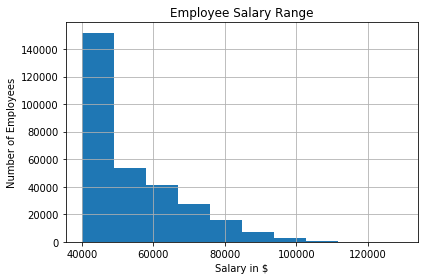

In [5]:
# Create a histogram to visualize the most common salary ranges for employees.
_=salaries.hist(column="salary")
plt.title("Employee Salary Range")
plt.xlabel("Salary in $")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

In [6]:
# Query Titles records in the Database
titles = pd.read_sql("SELECT * FROM Titles", connection)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
# Merge Employees data with Salaries data
emp_salary = pd.merge(emp_data, salaries, on="emp_no", how="inner")
emp_salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [8]:
# Then merge new dataframe with Titles data to get the average salary by title
salary_title = pd.merge(emp_salary, titles, left_on="emp_title_id", right_on="title_id", how="inner")
salary_title.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,s0001,Staff


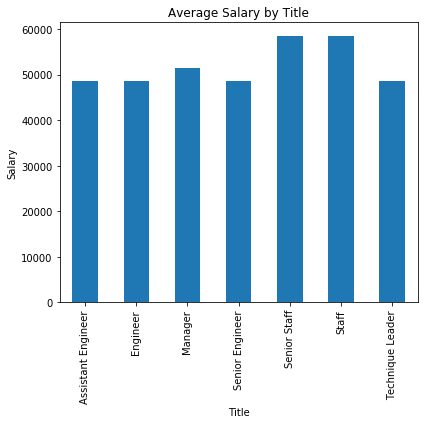

In [9]:
# Create a bar chart of average salary by title.
plt.figure(figsize=(6,6))
_=salary_title.groupby("title")["salary"].mean().plot(kind="bar")
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()